<a href="https://colab.research.google.com/github/tiwaryshreshtha/nlp/blob/main/Copy_of_AIandVisualizationLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Techniques for data preprocessing : Mean Removal, Scaling, Normalization

In [ ]:
#Mean Removal
import csv
import statistics
def remove_mean(input_file,output_file):
  with open(input_file,'r') as file:
    reader = csv.reader(file)
    data = [float(row[0]) for row in reader]
  mean_value = statistics.mean(data)
  mean_removed_data = [x-mean_value for x in data]
  with open(output_file,'w',newline='') as file:
      writer = csv.writer(file)
      for value in mean_removed_data:
        writer.writerow([value])
if __name__ == "__main__":
    input_file = "data.csv"
    output_file = "mean_removed_data.csv"
    remove_mean(input_file,output_file)

In [ ]:
#Scaling
import csv
def min_max_scaling(input_file,output_file,new_min=0,new_max=1):
  with open(input_file,'r') as file:
    reader = csv.reader(file)
    data = [float(row[0]) for row in reader]
  current_min = min(data)
  current_max = max(data)
  scaled_data = [(x - current_min) / (current_max - current_min) * (new_max - new_min) + new_min for x in data]
  with open(output_file,'w',newline='') as file:
    writer = csv.writer(file)
    for value in scaled_data:
      writer.writerow([value])
if __name__ == "__main__":
  input_file = "data.csv"
  output_file = "scaled_data.csv"
  min_max_scaling(input_file,output_file)

In [ ]:
#Normalization
import csv
import statistics

def z_score(input_file, output_file):
    with open(input_file, 'r') as file:
        reader = csv.reader(file)
        data = [float(row[0]) for row in reader]

    mean_value = statistics.mean(data)
    std_deviation = statistics.stdev(data)

    normalized_data = [(x - mean_value) / std_deviation for x in data]

    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file)
        for value in normalized_data:
            writer.writerow([value])

if __name__ == "__main__":
    input_file = "data.csv"
    output_file = "normalized_data.csv"
    z_score(input_file, output_file)

#2 Classification techniques : Naive Bayes Classifier, SVM, Logistic Regression, Decision Tree, Random Forest

In [ ]:
#Naive Bayes Classifier
import pandas as pd
f = pd.DataFrame({'Weather':['Sunny','Rainy','Sunny','Sunny'],'Wind':['Mild','Mild','High','Mild'],'Temp':['Moderate','Mild','Moderate','Mild'],'go':['Yes','No','Yes','Yes']})
print(f.columns)
from sklearn.naive_bayes import GaussianNB as g
from sklearn.preprocessing import LabelEncoder as le
from sklearn.model_selection import train_test_split as tt
l=le()
for i in f.columns:
  f[i]=l.fit_transform(f[i])
  x=f.iloc[:,:3]
  y=f.iloc[:,3]
xtr,xte,ytr,yte=tt(x,y,test_size=0.3)
gg=g()
gg.fit(xtr,ytr)
y_pred=gg.predict(xte)
from sklearn.metrics import accuracy_score
print(accuracy_score(yte,y_pred))

Index(['Weather', 'Wind', 'Temp', 'go'], dtype='object')
1.0


[[64  4]
 [ 3 29]]


<ipython-input-8-c94649d1a075>:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],c=ListedColormap(('pink','green'))(i),label=j)


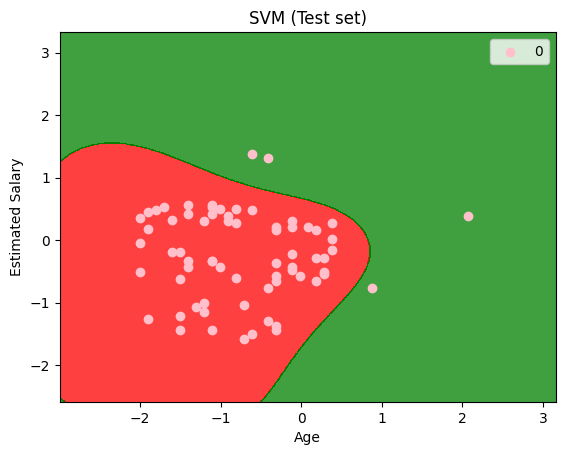

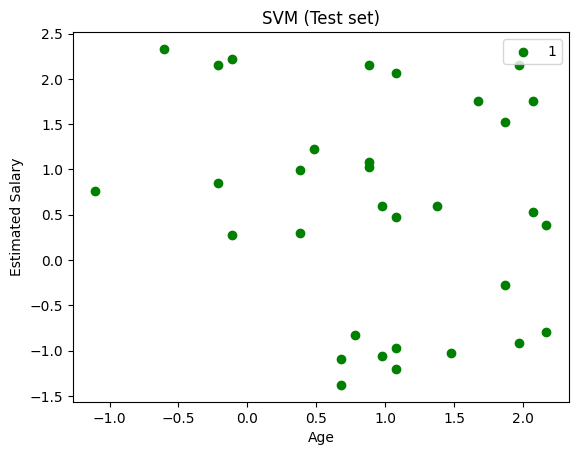

In [ ]:
#SVM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("/content/Social_Network _Ads.csv")
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],c=ListedColormap(('pink','green'))(i),label=j)
  plt.title('SVM (Test set)')
  plt.xlabel('Age')
  plt.ylabel('Estimated Salary')
  plt.legend()
  plt.show()

[[ 0.28085796 -0.67204882]
 [ 1.35876151  0.40496103]
 [-0.81313372  0.20914106]
 [-0.43506306 -0.86786879]
 [-0.99010296 -0.47622884]
 [-0.57181202  0.40496103]
 [ 0.07171249  1.77570083]
 [-0.3546225  -0.57413883]
 [-0.99010296 -0.67204882]
 [-0.3546225  -0.28040887]]
Confusion Matrix:
 [[62  3]
 [18 15]]
Accuracy:  0.7857142857142857


<ipython-input-10-5b93f1d2dcf6>:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c = ListedColormap(('red','green'))(i),label=j)


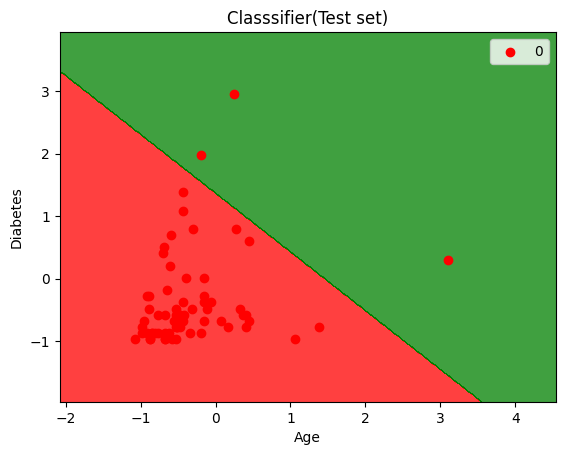

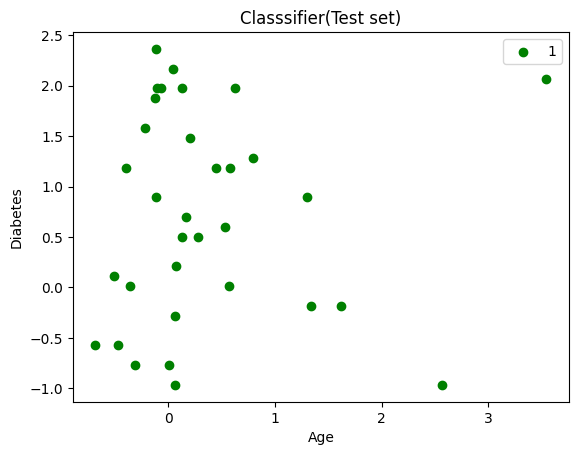

In [ ]:
#Logistic Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
dataset = pd.read_csv("/content/diabetes.csv")
x = dataset.iloc[:,[4,7]].values
y = dataset.iloc[:,8].values
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
print(xtrain[0:10,:])
classifier = LogisticRegression(random_state=0)
classifier.fit(xtrain,ytrain)
y_pred = classifier.predict(xtest)
cm = confusion_matrix(ytest,y_pred)
print("Confusion Matrix:\n",cm)
print("Accuracy: ",accuracy_score(ytest,y_pred))
X_set,y_set = xtest,ytest
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c = ListedColormap(('red','green'))(i),label=j)
  plt.title('Classsifier(Test set)')
  plt.xlabel('Age')
  plt.ylabel('Diabetes')
  plt.legend()
  plt.show()

In [ ]:
#Decision Tree
import pandas as pd
import math
import numpy as np

data = pd.read_csv("3-dataset.csv")
features = [feat for feat in data]
features.remove("answer")

class Node:
    def __init__(self):
        self.children = []
        self.value = ""
        self.isLeaf = False
        self.pred = ""
def entropy(examples):
    pos = 0.0
    neg = 0.0
    for _, row in examples.iterrows():
        if row["answer"] == "yes":
            pos += 1
        else:
            neg += 1
    if pos == 0.0 or neg == 0.0:
        return 0.0
    else:
        p = pos / (pos + neg)
        n = neg / (pos + neg)
        return -(p * math.log(p, 2) + n * math.log(n, 2))


def info_gain(examples, attr):
    uniq = np.unique(examples[attr])
    gain = entropy(examples)
    for u in uniq:
        subdata = examples[examples[attr] == u]
        sub_e = entropy(subdata)
        gain -= (float(len(subdata)) / float(len(examples))) * sub_e
    return gain

def ID3(examples, attrs):
    root = Node()

    max_gain = 0
    max_feat = ""
    for feature in attrs:
        gain = info_gain(examples, feature)
        if gain > max_gain:
            max_gain = gain
            max_feat = feature
    root.value = max_feat
    uniq = np.unique(examples[max_feat])
    for u in uniq:
        subdata = examples[examples[max_feat] == u]
        if entropy(subdata) == 0.0:
            newNode = Node()
            newNode.isLeaf = True
            newNode.value = u
            newNode.pred = np.unique(subdata["answer"])
            root.children.append(newNode)
        else:
            dummyNode = Node()
            dummyNode.value = u
            new_attrs = attrs.copy()
            new_attrs.remove(max_feat)
            child = ID3(subdata, new_attrs)
            dummyNode.children.append(child)
            root.children.append(dummyNode)

    return root

def printTree(root: Node, depth=0):
    for i in range(depth):
        print("\t", end="")
    print(root.value, end="")
    if root.isLeaf:
        print(" -> ", root.pred)
    print()
    for child in root.children:
        printTree(child, depth + 1)

def classify(root: Node, new):
    for child in root.children:
        if child.value == new[root.value]:
            if child.isLeaf:
                print ("Predicted Label for new example", new," is:", child.pred)
                exit
            else:
                classify (child.children[0], new)

root = ID3(data, features)
print("Decision Tree is:")
printTree(root)
print ("------------------")

new = {"outlook":"sunny", "temperature":"hot", "humidity":"normal", "wind":"strong"}
classify (root, new)

Decision Tree is:
outlook
	overcast ->  ['yes']

	overlook ->  ['yes']

	rain
		wind
			strong ->  ['no']

			weak ->  ['yes']

	sunny
		humidity
			high ->  ['no']

			normal ->  ['yes']

------------------
Predicted Label for new example {'outlook': 'sunny', 'temperature': 'hot', 'humidity': 'normal', 'wind': 'strong'}  is: ['yes']


Classification Accuracy: 98.7012987012987
[[157   4]
 [  0 147]]


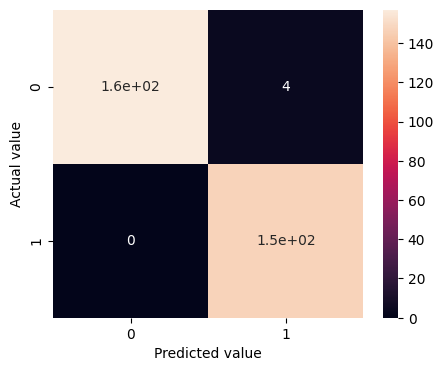

In [ ]:
#Random Forest
import pandas as pd
data=pd.read_csv("heart.csv")
X =data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]].values
y =data.iloc[:,13].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
from sklearn import metrics
print("Classification Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

3 K-Means clustering Algorithm

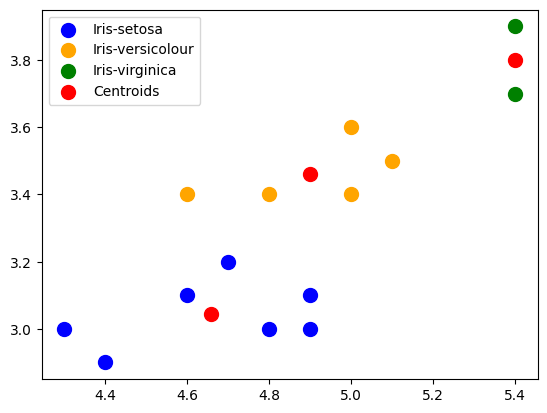

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
iris = pd.read_csv("Iris1.csv")
x = iris.iloc[:, [ 1,2,3,4]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

plt.show()


5 Bulding bag of words model using NLTK

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_words = [word.lower() for word in word_tokens if word.isalpha() and word.lower() not in stop_words]
    return filtered_words

def create_bow_model(texts):
    all_words = []
    for text in texts:
        words = preprocess_text(text)
        all_words.extend(words)

    word_freq = FreqDist(all_words)
    bow_model = {word: freq for word, freq in word_freq.items()}
    return bow_model

# Example usage
texts = [
    "The cat sat on the mat, and the mat was comfortable.",
    "She sang a sweet song, a song that touched everyone's heart.",
    "Coding coding can be challenging, but coding is also incredibly rewarding.",
]

bow_model = create_bow_model(texts)

# Print the Bag of Words model
print("Bag of Words Model:")
for word, freq in bow_model.items():
    print(f"{word}: {freq}")


Bag of Words Model:
cat: 1
sat: 1
mat: 2
comfortable: 1
sang: 1
sweet: 1
song: 2
touched: 1
everyone: 1
heart: 1
coding: 3
challenging: 1
also: 1
incredibly: 1
rewarding: 1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


6 Identifying patterns in text data

In [ ]:
import csv
import re

def identify_patterns(csv_file_path, column_name):
    patterns = {}

    with open(csv_file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)

        for row in reader:
            text = row[column_name]

            # Example pattern: finding words that start with 'pattern'
            pattern_matches = re.findall(r'Female', text, flags=re.IGNORECASE)

            # Update patterns dictionary with matches
            for match in pattern_matches:
                if match in patterns:
                    patterns[match] += 1
                else:
                    patterns[match] = 1

    return patterns
csv_file_path = '2b Social_Network _Ads.csv'  # Update with your CSV file path
column_name = 'Gender'     # Update with the actual column name in your CSV file

result = identify_patterns(csv_file_path, column_name)

# Display the identified patterns and their counts
for pattern, count in result.items():
    print(f"Pattern: {pattern}, Count: {count}")

Pattern: Female, Count: 204


In [ ]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.1 MB/s eta 0:00:00


7 Hidden Markov Model

In [ ]:
import numpy as np
from hmmlearn import hmm

# Step 1: Define Model Parameters
n_states = 2  # Number of hidden states (Rainy and Sunny)

# Transition matrix (A): Probability of transitioning from one state to another
trans_matrix = np.array([[0.7, 0.3], [0.4, 0.6]])

# Emission matrix (B): Probability of observing an emission given the current state
emission_matrix = np.array([[0.1, 0.4, 0.5], [0.6, 0.3, 0.1]])

# Initial state probabilities (π): Probability distribution of starting in each state
initial_probs = np.array([0.6, 0.4])

# Step 2: Create HMM Model
model = hmm.MultinomialHMM(n_components=n_states,
                           startprob_prior=initial_probs,
                           transmat_prior=trans_matrix,
                           n_iter=100)

# Step 3: Generate Training Data (for simplicity, you can use a pre-existing dataset)
# Observations: 0 - Umbrella, 1 - Jacket, 2 - T-shirt
train_data = np.array([[0, 1, 2, 0, 1, 2, 0, 2, 1]])

# Reshape the array if needed
train_data = train_data.reshape(-1, 1)

# Step 4: Fit the Model
model.fit(train_data)

# Step 5: Predict States for a New Sequence
new_data = np.array([[0, 2, 1]])  # Umbrella, T-shirt, Jacket
new_data = new_data.reshape(-1, 1)
predicted_states = model.predict(new_data)

# Map numerical predictions to weather states
weather_states = ['Rainy', 'Sunny']
predicted_states_text = [weather_states[state] for state in predicted_states]

# Display Results
print("Predicted Weather States:", predicted_states_text)

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Predicted Weather States: ['Sunny', 'Rainy', 'Sunny']


8 Heuristic Search

In [ ]:
def aStarAlgo(start_node, stop_node):

        open_set = set(start_node)
        closed_set = set()
        g = {} #store distance from starting node
        parents = {}# parents contains an adjacency map of all nodes

        #ditance of starting node from itself is zero
        g[start_node] = 0
        #start_node is root node i.e it has no parent nodes
        #so start_node is set to its own parent node
        parents[start_node] = start_node


        while len(open_set) > 0:
            n = None

            #node with lowest f() is found
            for v in open_set:
                if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                    n = v


            if n == stop_node or Graph_nodes[n] == None:
                pass
            else:
                for (m, weight) in get_neighbors(n):
                    #nodes 'm' not in first and last set are added to first
                    #n is set its parent
                    if m not in open_set and m not in closed_set:
                        open_set.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight


                    #for each node m,compare its distance from start i.e g(m) to the
                    #from start through n node
                    else:
                        if g[m] > g[n] + weight:
                            #update g(m)
                            g[m] = g[n] + weight
                            #change parent of m to n
                            parents[m] = n

                            #if m in closed set,remove and add to open
                            if m in closed_set:
                                closed_set.remove(m)
                                open_set.add(m)

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                path = []

                while parents[n] != n:
                    path.append(n)
                    n = parents[n]

                path.append(start_node)

                path.reverse()

                print('Path found: {}'.format(path))
                return path


            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_set.remove(n)
            closed_set.add(n)

        print('Path does not exist!')
        return None

#define fuction to return neighbor and its distance
#from the passed node
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None
#for simplicity we ll consider heuristic distances given
#and this function returns heuristic distance for all nodes
def heuristic(n):
        H_dist = {
            'A': 11,
            'B': 6,
            'C': 99,
            'D': 1,
            'E': 7,
            'G': 0,

        }

        return H_dist[n]

#Describe your graph here
Graph_nodes = {
    'A': [('B', 2), ('E', 3)],
    'B': [('C', 1),('G', 9)],
    'C': None,
    'E': [('D', 6)],
    'D': [('G', 1)],

}
aStarAlgo('A', 'G')

Path found: ['A', 'E', 'D', 'G']


['A', 'E', 'D', 'G']

#9 A bot to play tic tac toe

In [ ]:
def print_board(board):
    for row in board:
        print(" | ".join(row))
        print("-" * 5)

def check_winner(board, player):
    # Check rows, columns, and diagonals
    for i in range(3):
        if all(board[i][j] == player for j in range(3)) or all(board[j][i] == player for j in range(3)):
            return True
    if all(board[i][i] == player for i in range(3)) or all(board[i][2 - i] == player for i in range(3)):
        return True
    return False

def is_board_full(board):
    return all(board[i][j] != " " for i in range(3) for j in range(3))

def tic_tac_toe():
    board = [[" " for _ in range(3)] for _ in range(3)]
    players = ["X", "O"]
    current_player = players[0]

    while True:
        print_board(board)

        # Get player move
        while True:
            row = int(input("Enter row (0, 1, or 2): "))
            col = int(input("Enter column (0, 1, or 2): "))
            if 0 <= row < 3 and 0 <= col < 3 and board[row][col] == " ":
                break
            else:
                print("Invalid move. Try again.")

        # Make the move
        board[row][col] = current_player

        # Check for a winner
        if check_winner(board, current_player):
            print_board(board)
            print(f"Player {current_player} wins!")
            break

        # Check for a tie
        if is_board_full(board):
            print_board(board)
            print("It's a tie!")
            break

        # Switch to the other player
        current_player = players[1] if current_player == players[0] else players[0]

if __name__ == "__main__":
    tic_tac_toe()

  |   |  
-----
  |   |  
-----
  |   |  
-----
Enter row (0, 1, or 2): 1
Enter column (0, 1, or 2): 1
  |   |  
-----
  | X |  
-----
  |   |  
-----
Enter row (0, 1, or 2): 1
Enter column (0, 1, or 2): 2
  |   |  
-----
  | X | O
-----
  |   |  
-----
Enter row (0, 1, or 2): 3
Enter column (0, 1, or 2): 1
Invalid move. Try again.
Enter row (0, 1, or 2): 1
Enter column (0, 1, or 2): 0
  |   |  
-----
X | X | O
-----
  |   |  
-----
Enter row (0, 1, or 2): 2
Enter column (0, 1, or 2): 2
  |   |  
-----
X | X | O
-----
  |   | O
-----
Enter row (0, 1, or 2): 1
Enter column (0, 1, or 2): 2
Invalid move. Try again.
Enter row (0, 1, or 2): 0
Enter column (0, 1, or 2): 1
  | X |  
-----
X | X | O
-----
  |   | O
-----
Enter row (0, 1, or 2): 2
Enter column (0, 1, or 2): 1
  | X |  
-----
X | X | O
-----
  | O | O
-----
Enter row (0, 1, or 2): 0
Enter column (0, 1, or 2): 2
  | X | X
-----
X | X | O
-----
  | O | O
-----
Enter row (0, 1, or 2): 0
Enter column (0, 1, or 2): 0
O | X | X
-----


10 Single layer neural networks, Multi layer neural networks

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and preprocess the Iris dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = StandardScaler().fit_transform(X_train), StandardScaler().fit_transform(X_test)

# Define and compile a single-layer neural network
model_single_layer = models.Sequential([layers.Dense(64, 'relu', input_shape=(4,)), layers.Dense(3, 'softmax')])
model_single_layer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_single_layer.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# Evaluate the single-layer model
single_layer_accuracy = accuracy_score(y_test, np.argmax(model_single_layer.predict(X_test), axis=1))
print(f"\nSingle-layer Neural Network - Accuracy: {single_layer_accuracy}")

# Define and compile a multi-layer neural network
model_multi_layer = models.Sequential([layers.Dense(64, 'relu', input_shape=(4,)), layers.Dense(32, 'relu'), layers.Dense(3, 'softmax')])
model_multi_layer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_multi_layer.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# Evaluate the multi-layer model
multi_layer_accuracy = accuracy_score(y_test, np.argmax(model_multi_layer.predict(X_test), axis=1))
print(f"\nMulti-layer Neural Network - Accuracy: {multi_layer_accuracy}")

Epoch 1/15
4/4 [==============================] - 1s 116ms/step - loss: 1.1275 - accuracy: 0.3583 - val_loss: 1.1029 - val_accuracy: 0.3667
Epoch 2/15
4/4 [==============================] - 0s 21ms/step - loss: 1.0607 - accuracy: 0.4417 - val_loss: 1.0337 - val_accuracy: 0.5000
Epoch 3/15
4/4 [==============================] - 0s 19ms/step - loss: 0.9992 - accuracy: 0.5083 - val_loss: 0.9700 - val_accuracy: 0.5000
Epoch 4/15
4/4 [==============================] - 0s 17ms/step - loss: 0.9414 - accuracy: 0.5500 - val_loss: 0.9118 - val_accuracy: 0.5667
Epoch 5/15
4/4 [==============================] - 0s 21ms/step - loss: 0.8873 - accuracy: 0.6333 - val_loss: 0.8588 - val_accuracy: 0.6667
Epoch 6/15
4/4 [==============================] - 0s 19ms/step - loss: 0.8391 - accuracy: 0.6667 - val_loss: 0.8095 - val_accuracy: 0.7667
Epoch 7/15
4/4 [==============================] - 0s 26ms/step - loss: 0.7959 - accuracy: 0.6833 - val_loss: 0.7637 - val_accuracy: 0.8000
Epoch 8/15
4/4 [==========

11 Building Linear Regressor using ANN

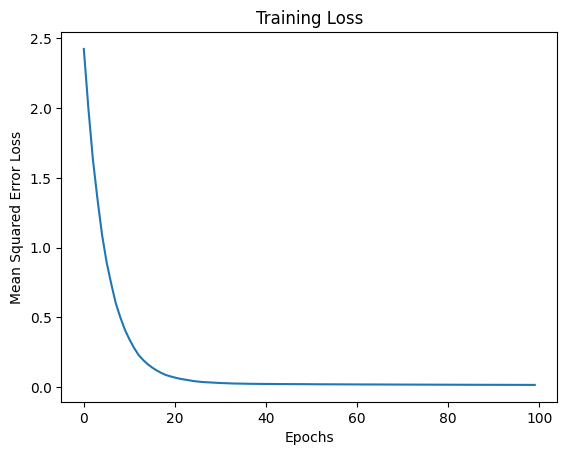

1/1 [==============================] - 0s 72ms/step
Input: 0.2, Predicted Output: 1.5068470239639282
Input: 0.5, Predicted Output: 2.0190227031707764
Input: 0.8, Predicted Output: 2.531198501586914


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
np.random.seed(0)
X_train = np.random.rand(100, 1)
y_train = 2 * X_train + 1 + 0.1 * np.random.randn(100, 1)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(1,))
])

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=0)

# Plot the training loss over epochs
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training Loss')
plt.show()

# Make predictions on new data
X_test = np.array([[0.2], [0.5], [0.8]])
predictions = model.predict(X_test)

# Print the predictions
for i in range(len(X_test)):
    print(f"Input: {X_test[i][0]}, Predicted Output: {predictions[i][0]}")

12 Image Classifier : An application of Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values
# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc}')

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1688/1688 [==============================] - 51s 29ms/step - loss: 0.1492 - accuracy: 0.9534 - val_loss: 0.0642 - val_accuracy: 0.9813
Epoch 2/5
1688/1688 [==============================] - 50s 30ms/step - loss: 0.0500 - accuracy: 0.9843 - val_loss: 0.0408 - val_accuracy: 0.9885
Epoch 3/5
1688/1688 [==============================] - 47s 28ms/step - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.0463 - val_accuracy: 0.9877
Epoch 4/5
1688/1688 [==============================] - 48s 28ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0382 - val_accuracy: 0.9888
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0318 - accuracy: 0.9896

Test accuracy: 0.9896000027656555
